# RandomForest

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *

/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type         train         val        test
n_observations      319150       33482       33309
relative_size      0.82694   0.0867542   0.0863059
n_cols                  71          71          71
positives            42697        4555        4507
negatives           276453       28927       28802
positive_prop     0.133783    0.136043    0.135309
negative_prop     0.866217    0.863957    0.864691
min_date        2017-01-01  2018-11-11  2018-11-11
max_date        2018-11-10  2019-11-11  2019-11-11

In [4]:
model_params = {'classifier': 'random_forest',
               'accepts_sparse': True,
                'categorical_features' : ['gender'],
                'numerical_features' : ['patient_age']
               }

In [5]:
sample_model = Model(**model_params)
sample_model.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


In [6]:
%%time
import time
start = time.time()
sample_model.fit_classifier()
end = time.time()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.645268	validation_set's auc: 0.634394
[20]	training_set's auc: 0.645443	validation_set's auc: 0.634678
[30]	training_set's auc: 0.64542	validation_set's auc: 0.63479
[40]	training_set's auc: 0.645536	validation_set's auc: 0.63479
[50]	training_set's auc: 0.645477	validation_set's auc: 0.635069
[60]	training_set's auc: 0.64545	validation_set's auc: 0.63518
[70]	training_set's auc: 0.64548	validation_set's auc: 0.635075
[80]	training_set's auc: 0.645552	validation_set's auc: 0.63487
[90]	training_set's auc: 0.645589	validation_set's auc: 0.634744
[100]	training_set's auc: 0.645569	validation_set's auc: 0.6346
CPU times: user 9.44 s, sys: 353 ms, total: 9.8 s
Wall time: 19.1 s


In [7]:
perf = sample_model.get_performance_metrics()

training AUC ROC score:  0.6455688732548364
validation AUC ROC score:  0.6345999166606489
relative over-fitting:  0.0169911485026905


In [8]:
n = sample_model.n_features

In [9]:
# Write to the csv file ('a' means append)
import csv
out_file = 'experiments/output.csv'
of_connection = open(out_file, 'a')
writer = csv.writer(of_connection)
writer.writerow([1, 
                 'baseline', 
                 'rf', 
                 n,
                 end-start,
                 perf['auc_training'],
                 perf['auc_validation'],
                 perf['overfitting']
                ])
of_connection.close()

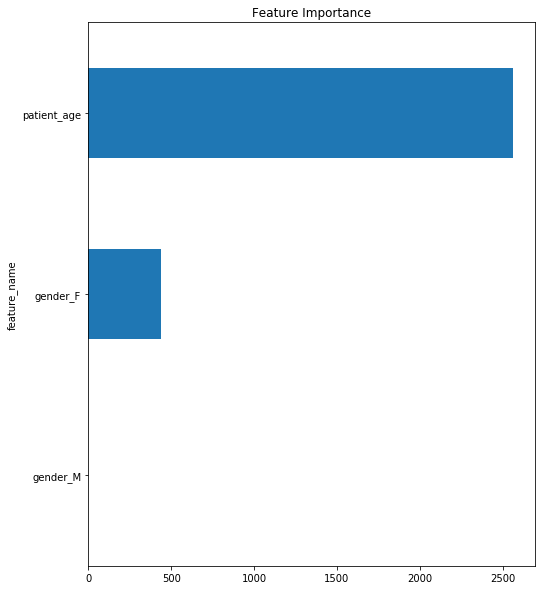

In [10]:
sample_model.plot_feature_importance()

In [14]:
estimator = sample_model.classifier.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/tree.dot', 
                feature_names = [name[:10] for name in sample_model.model_features],
                class_names = ['False','True'],
                rounded = False, proportion = False, 
                precision = 2, filled = True,impurity=False,
               rotate=False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', '/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/tree.dot', '-o', 
      '/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/baseline/rf_tree.png', '-Gdpi=600'])


0

In [15]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = '/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/baseline/rf_tree.png',width=4000,height=4000)